In [87]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
samp = np.loadtxt('170170.txt', usecols=4)
MIN=samp.min();MAX=samp.max();MEAN=samp.mean();STD=samp.std();VAR=samp.var()
MIN,MAX,MEAN,STD,VAR

(1527.85, 6831.3, 2471.2782, 1061.9694483659878, 1127779.1092627603)

In [89]:
param = stats.pearson3.fit(samp,loc=0) # distribution fitting

x = np.linspace(MIN,MAX,1000) # fitted distribution
pdf_fitted = stats.pearson3.pdf(x, *param)

In [90]:
lambdaa = 2/(stats.skew(samp) * STD)
kay = (STD * lambdaa) ** 2
epsilon = MEAN - kay/lambdaa
lambdaa, kay, epsilon

(0.0008133827305993075, 0.7461290347143725, 1553.9621485950015)

Power_divergenceResult(statistic=31.402156708721037, pvalue=2.1238389521219528e-05)
31.917635588307178


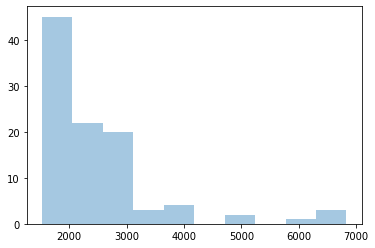

In [91]:
# chi-square
counts, edges, plot = plt.hist(samp,bins=10,alpha=0.4)

summ = 0
for i in range(0,10):
    upper_cdf = stats.pearson3.cdf(edges[i+1], *param)
    lower_cdf = stats.pearson3.cdf(edges[i], *param)
    summ += (counts[i]**2/(100*(upper_cdf-lower_cdf)))
chi_statistic = summ - 100

exp_counts = np.array([])
for i in range(0,10):
    upper_cdf = stats.pearson3.cdf(edges[i+1], *param)
    lower_cdf = stats.pearson3.cdf(edges[i], *param)
    exp_counts = np.append(exp_counts, 100 * (upper_cdf - lower_cdf))
print(stats.chisquare(counts,exp_counts,ddof=3))
print(chi_statistic)

In [93]:
stats.kstest(samp,'pearson3',args = (param[0],param[1],param[2]))

KstestResult(statistic=0.0630431863331079, pvalue=0.8216121464685041)

(array([8.48504276e-04, 4.14824312e-04, 3.77113011e-04, 5.65669517e-05,
        7.54226023e-05, 0.00000000e+00, 3.77113011e-05, 0.00000000e+00,
        1.88556506e-05, 5.65669517e-05]),
 array([1527.85 , 2058.195, 2588.54 , 3118.885, 3649.23 , 4179.575,
        4709.92 , 5240.265, 5770.61 , 6300.955, 6831.3  ]),
 <a list of 10 Patch objects>)

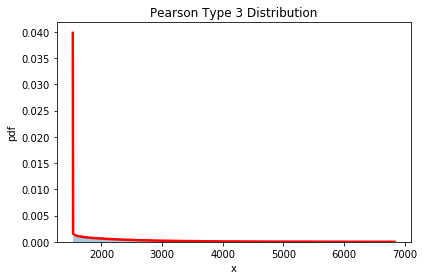

In [94]:
fig,axes = plt.subplots()

axes.plot(x,pdf_fitted,'r',lw=2.5)
axes.set_xlabel('x')
axes.set_ylabel('pdf')
axes.set_title('Pearson Type 3 Distribution')
fig.tight_layout()

plt.hist(samp,alpha=0.4,density=True)

In [95]:
k = 3
logLik = np.sum(stats.pearson3.logpdf(samp, *param)) 
aic = 2*k - 2*(logLik)
aic

1569.3108758471192

In [96]:
dis = stats.pearson3.ppf(0.98,*param)
dis

5417.289232785233